In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl


Fourier Analysis of a Plucked String
------------------------------------

Let's assume we're studying a plucked string with a shape like this:

\begin{eqnarray}
f(x) & = & 2 A \frac{x}{L}  &  (x<L/2) \\
\\
f(x) & = & 2 A \left(\frac{L-x}{L}\right) & (x >= L/2)
\end{eqnarray}

Let's graph that and see what it looks like:

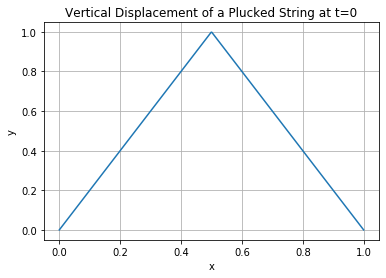

In [2]:
L=1.0
N=500  # make sure N is even for simpson's rule
A=1.0

def fLeft(x):
    return 2*A*x/L
    
def fRight(x):
    return 2*A*(L-x)/L

def fa_vec(x):
    """
    vector version
    'where(cond, A, B)', returns A when cond is true and B when cond is false.
    """
    return np.where(x<L/2, fLeft(x), fRight(x))

x=np.linspace(0,L,N)  # define the 'x' array
h=x[1]-x[0]        # get x spacing
y=fa_vec(x)
pl.title("Vertical Displacement of a Plucked String at t=0")
pl.xlabel("x")
pl.ylabel("y")
pl.plot(x,y)
pl.grid()

Let's define the basis functions:

\begin{equation}
|n\rangle = b_n(x) = \sqrt{\frac{2}{L}} \sin(n \pi x/L)
\end{equation}

Let's look at a few of those. In python well use the function `basis(x,n)` for $|n\rangle$:

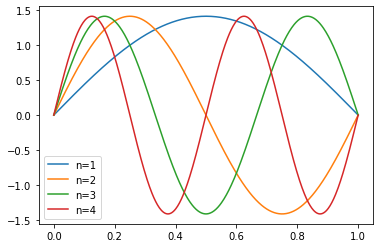

In [3]:
def basis(x, n):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

for n in range(1,5):
    pl.plot(x,basis(x,n),label="n=%d"%n)
    
pl.legend(loc=3)

If we guess that we can express $f(x)$ as a superposition of $b_n(x)$ then we have:

\begin{equation}
f(x) = c_1 b_1(x) + c_2 b_2(x) + c_3 b_3(x) + \cdots = \sum_{n=1}^\infty c_n b_n(x)
\end{equation}

What happens if we multiply $f(x)$ with $b_m(x)$ and then integrate from $x=0$ to $x=L$?

\begin{equation}
\int_0^L f(x) b_m(x) dx = c_1 \int_0^L b_m(x) b_1(x)dx + c_2 \int_0^L b_m(x) b_2(x)dx + c_3 \int_0^L b_m(x) b_3(x)dx + \cdots
\end{equation}

or more compactly in dirac notation:

\begin{equation}
\langle m|f\rangle = c_1 \langle m|1\rangle + c_2 \langle m|2\rangle + c_3 \langle m|3\rangle + \cdots
\end{equation}

or equivalently:

\begin{equation}
\langle m|f\rangle = \sum_{n=1}^\infty c_n \langle m|n\rangle
\end{equation}

Remember that the $b_n(x)$ are *orthonormal* so that means:

$$\langle n|m \rangle = \int_0^L b_n(x) b_m(x)dx = \delta_{nm}$$

where $\delta_{nm}$ is defined as 0 if $n<>m$ and 1 if $n=m$.

So:

$$\sum_{n=1}^\infty c_n \langle m|n\rangle = c_m$$

or in other words:

$$c_m = \langle m|f\rangle = \int_{0}^{L} b_m(x) f(x)  dx $$

Yeah! Let's do that integral for this case. Note that the function $f(x)$ is symmetric about the midpoint, just like $b_m$ when $m$ is odd. When $m$ is even, the integral is zero. SO, for *odd* m we can write:

$$ c_m = \int_{0}^{L} b_m(x) f(x)  dx = 2 \int_{0}^{L/2} b_m(x) f(x)  dx $$

(when $m$ is odd) or:

$$ c_m = 2 \int_0^{L/2}  \sqrt{\frac{2}{L}} \sin(\frac{m\pi x}{L}) 2A \frac{x}{L} dx $$

$$ c_m = \frac{4A}{L} \sqrt{\frac{2}{L}} \int_0^{L/2} x\sin(\frac{m\pi x}{L}) dx $$

$$ c_m = \frac{4A}{L} \sqrt{\frac{2}{L}} \frac{L^2}{\pi^2 m^2} (-1)^{\frac{m-1}{2}}$$

Or simplifying:

$$ c_m = \frac{4A \sqrt{2L}}{\pi^2 m^2} (-1)^{\frac{m-1}{2}}$$


         n	      coef	coef(theory)
       ---	     -----	------------
         1	   0.57316	   0.57316
         2	   0.00000	   0.00000
         3	  -0.06368	  -0.06368
         4	   0.00000	   0.00000
         5	   0.02292	   0.02293
         6	   0.00000	   0.00000
         7	  -0.01170	  -0.01170
         8	   0.00000	   0.00000
         9	   0.00707	   0.00708
        10	   0.00000	   0.00000
        11	  -0.00474	  -0.00474
        12	   0.00000	   0.00000
        13	   0.00339	   0.00339
        14	   0.00000	   0.00000
        15	  -0.00255	  -0.00255
        16	   0.00000	   0.00000
        17	   0.00198	   0.00198
        18	   0.00000	   0.00000
        19	  -0.00159	  -0.00159


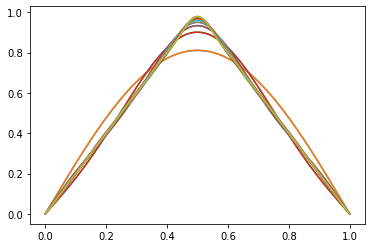

In [4]:
def simpson_array(f, h):
    """

Use Simpson's Rule to estimate an integral of an array of
    function samples
    
    f: function samples (already in an array format)
    h: spacing in "x" between sample points
    
    The array is assumed to have an even number of elements.
    
    """
    if len(f)%2 != 0:
        raise ValueError("Sorry, f must be an array with an even number of elements.")
        
    evens =  f[2:-2:2]
    odds = f[1:-1:2]
    return (f[0] + f[-1] + 2*odds.sum() + 4*evens.sum())*h/3.0

def braket(n):
    """
    Evaluate <n|f>
    """
    return simpson_array(basis(x,n)*fa_vec(x),h)

M=20
coefs = [0]
coefs_th = [0]
ys = [[]]
sup = np.zeros(N)
for n in range(1,M):
    coefs.append(braket(n))   # do numerical integral

    if n%2==0:
        coefs_th.append(0.0)
    else:
        coefs_th.append(4*A*np.sqrt(2*L)*(-1)**((n-1)/2.0)/(np.pi**2*n**2))  # compare theory
        
    ys.append(coefs[n]*basis(x,n))
    sup += ys[n]
    pl.plot(x,sup)

print("%10s\t%10s\t%10s" % ('n', 'coef','coef(theory)'))
print("%10s\t%10s\t%10s" % ('---','-----','------------'))

for n in range(1,M):
    print("%10d\t%10.5f\t%10.5f" % (n, coefs[n],coefs_th[n]))



Project 11
============

Pick your own function and compute it's fourier coefficients analytically. Then, check your answer both graphically and numerically using simpson's rule.
